In [2]:
install.packages("caret")
install.packages("nnet")
install.packages("smotefamily")
install.packages("(DMwR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘(DMwR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
library(dplyr)
library(nnet)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [4]:
data <- read.csv('/content/loan_data_6061.csv')
data <- data %>% select(-id)

In [8]:
num_cols <- sapply(data, is.numeric)
data[num_cols] <- scale(data[num_cols])

In [9]:
head(data, 5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,⋯,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1.2875540,-1.2875515,-1.2872937,-0.6670735,0.2694998,-1.2373230,C,C4,1.0871997,MORTGAGE,⋯,0.47049792,-1.9086679,-1.1470153,-0.3397011,-0.1323778,-0.03817519,-0.91482930,-0.9305423,-0.7363810,N
2,0.9895040,0.9895059,0.9903224,-0.6670735,-0.1428577,1.3684336,C,C1,1.0871997,MORTGAGE,⋯,-0.06731137,0.3656722,-0.9339362,-0.3397011,-0.1323778,0.71266714,-0.29882794,2.3812833,-0.4994580,N
3,2.1010536,2.1010553,2.1021445,1.4990834,0.4468136,1.4043854,C,C5,1.0871997,MORTGAGE,⋯,-0.60512066,0.6541251,-1.1470153,-0.3397011,-0.1323778,1.08375058,-0.05127417,1.6577635,-0.6439349,N
4,-0.5537154,-0.5537131,-0.5532752,1.4990834,2.0137723,-0.6136605,F,F1,-0.7910666,MORTGAGE,⋯,1.00830721,0.2769175,0.5133413,-0.3397011,-0.1323778,1.40600086,0.79407019,-0.1596492,0.8750982,N
5,-0.3864434,-0.3864411,-0.3859622,-0.6670735,0.1561015,-0.1828745,C,C3,-0.5227429,RENT,⋯,-1.14292994,0.6541251,1.6202457,-0.3397011,-0.1323778,-0.92808407,-0.81674745,-0.6290757,-0.9473211,N


In [17]:
cat_cols <- sapply(data, function(x) !is.numeric(x))
data[cat_cols] <- lapply(data[cat_cols], as.factor)
head(data, 5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,⋯,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.2875540,-1.2875515,-1.2872937,-0.6670735,0.2694998,-1.2373230,C,C4,1.0871997,MORTGAGE,⋯,0.47049792,-1.9086679,-1.1470153,-0.3397011,-0.1323778,-0.03817519,-0.91482930,-0.9305423,-0.7363810,N
2,0.9895040,0.9895059,0.9903224,-0.6670735,-0.1428577,1.3684336,C,C1,1.0871997,MORTGAGE,⋯,-0.06731137,0.3656722,-0.9339362,-0.3397011,-0.1323778,0.71266714,-0.29882794,2.3812833,-0.4994580,N
3,2.1010536,2.1010553,2.1021445,1.4990834,0.4468136,1.4043854,C,C5,1.0871997,MORTGAGE,⋯,-0.60512066,0.6541251,-1.1470153,-0.3397011,-0.1323778,1.08375058,-0.05127417,1.6577635,-0.6439349,N
4,-0.5537154,-0.5537131,-0.5532752,1.4990834,2.0137723,-0.6136605,F,F1,-0.7910666,MORTGAGE,⋯,1.00830721,0.2769175,0.5133413,-0.3397011,-0.1323778,1.40600086,0.79407019,-0.1596492,0.8750982,N
5,-0.3864434,-0.3864411,-0.3859622,-0.6670735,0.1561015,-0.1828745,C,C3,-0.5227429,RENT,⋯,-1.14292994,0.6541251,1.6202457,-0.3397011,-0.1323778,-0.92808407,-0.81674745,-0.6290757,-0.9473211,N


In [29]:
install.packages("fastDummies")
library(fastDummies)

new_data <- fastDummies::dummy_cols(data,
                                             select_columns = c("sub_grade", "hardship_flag", "initial_list_status",
                                                                "application_type", "home_ownership", "pymnt_plan"),
                                             remove_first_dummy = TRUE, remove_selected_columns = TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
new_data

loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,⋯,sub_grade_G4,sub_grade_G5,hardship_flag_Y,initial_list_status_w,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,pymnt_plan_y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
-1.28755402,-1.28755153,-1.28729369,-0.6670735,0.26949983,-1.237323023,C,1.08719968,-0.18380789,-1.11260323,⋯,0,0,0,1,0,1,0,0,0,0
0.98950395,0.98950591,0.99032242,-0.6670735,-0.14285774,1.368433642,C,1.08719968,-0.11229431,-0.26839198,⋯,0,0,0,1,0,1,0,0,0,0
2.10105358,2.10105528,2.10214450,1.4990834,0.44681358,1.404385422,C,1.08719968,0.20951681,-0.18521846,⋯,0,0,0,1,0,1,0,0,0,0
-0.55371543,-0.55371311,-0.55327523,1.4990834,2.01377234,-0.613660531,F,-0.79106661,0.16970520,0.50595351,⋯,0,0,0,1,0,1,0,0,0,0
-0.38644340,-0.38644112,-0.38596220,-0.6670735,0.15610150,-0.182874485,C,-0.52274285,-0.33398641,-0.75578882,⋯,0,0,0,1,0,0,0,0,1,0
0.48229199,0.48229407,0.48298613,-0.6670735,-0.72428191,0.685648783,B,1.08719968,0.71011189,-0.38400318,⋯,0,0,0,0,0,1,0,0,0,0
0.48229199,0.48229407,0.48298613,-0.6670735,-0.86448349,0.662029734,B,1.08719968,0.03073286,-0.13947302,⋯,0,0,0,1,0,1,0,0,0,0
-0.59688241,-0.59688008,-0.59645279,-0.6670735,-1.27684105,-0.551847387,A,0.01390466,0.03073286,-0.51708081,⋯,0,0,0,1,0,0,0,0,1,0
-0.81271729,-0.81271491,-0.81234057,-0.6670735,-0.24800892,-0.711462829,B,1.08719968,-0.27677555,1.29027983,⋯,0,0,0,1,0,1,0,0,0,0


In [34]:
ind<-createDataPartition(new_data$grade, p = .80, list = FALSE)
training<-new_data[ind,]
testing<-new_data[-ind,]

In [36]:
head(training,5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,⋯,sub_grade_G4,sub_grade_G5,hardship_flag_Y,initial_list_status_w,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,pymnt_plan_y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,-1.2875540,-1.2875515,-1.2872937,-0.6670735,0.2694998,-1.2373230,C,1.0871997,-0.1838079,-1.1126032,⋯,0,0,0,1,0,1,0,0,0,0
2,0.9895040,0.9895059,0.9903224,-0.6670735,-0.1428577,1.3684336,C,1.0871997,-0.1122943,-0.2683920,⋯,0,0,0,1,0,1,0,0,0,0
4,-0.5537154,-0.5537131,-0.5532752,1.4990834,2.0137723,-0.6136605,F,-0.7910666,0.1697052,0.5059535,⋯,0,0,0,1,0,1,0,0,0,0
5,-0.3864434,-0.3864411,-0.3859622,-0.6670735,0.1561015,-0.1828745,C,-0.5227429,-0.3339864,-0.7557888,⋯,0,0,0,1,0,0,0,0,1,0
6,0.4822920,0.4822941,0.4829861,-0.6670735,-0.7242819,0.6856488,B,1.0871997,0.7101119,-0.3840032,⋯,0,0,0,0,0,1,0,0,0,0


In [37]:
library(smotefamily)


training$grade <- as.factor(training$grade)


smote_output <- SMOTE(
  X = training[, -which(names(training) == "grade")],
  target = training$grade,
  K = 5,
  dup_size = 2
)

synth_data <- smote_output$syn_data
colnames(synth_data)[ncol(synth_data)] <- "grade"

balanced_data <- rbind(
  training,
  synth_data[, colnames(training)])

table(balanced_data$grade)



     A      B      C      D      E      F      G 
148209 203211 204909  94012  42464  12464  12552 

In [52]:
dim(balanced_data)
dim(data)
dim(testing)

[1] 717821    112

[1] 886812    118

[1] 177359    112

In [38]:
balanced_data$grade <- as.factor(balanced_data$grade)
balanced_data$grade<-relevel(balanced_data$grade,ref = "A")
train_control <- trainControl(method = "cv", number =3)
model <- train(grade ~ ., data = balanced_data, method = "multinom", trControl = train_control)

# weights:  791 (672 variable)
initial  value 931209.464096 
iter  10 value 392018.304684
iter  20 value 194867.120915
iter  30 value 135243.904561
iter  40 value 123947.082114
iter  50 value 114797.416138
iter  60 value 104665.020630
iter  70 value 93875.033387
iter  80 value 87915.531150
iter  90 value 84411.642382
iter 100 value 80685.060557
final  value 80685.060557 
stopped after 100 iterations
# weights:  791 (672 variable)
initial  value 931209.464096 
iter  10 value 392051.029785
iter  20 value 194938.467965
iter  30 value 135371.956381
iter  40 value 124076.288060
iter  50 value 114911.616453
iter  60 value 105227.739795
iter  70 value 94928.156766
iter  80 value 88996.420553
iter  90 value 85458.844167
iter 100 value 81699.418639
final  value 81699.418639 
stopped after 100 iterations
# weights:  791 (672 variable)
initial  value 931209.464096 
iter  10 value 392018.337411
iter  20 value 194867.192273
iter  30 value 135244.032639
iter  40 value 123947.211197
iter  50 value 11

In [47]:
train_pred <- predict(model,newdata=training)
conf_matrix=confusionMatrix(train_pred,training$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction      A      B      C      D      E      F      G
         A 148120      0      7    104    139     13      2
         B      6 202355    151    208    465     61     65
         C     19     43 204650      9      3      1      0
         D     36    671     60  93632    227     41     11
         E      5      5      6      3  41429     40      9
         F      0      1      0      0      3  12283      1
         G     23    136     35     56    198     25   4096

Overall Statistics
                                          
               Accuracy : 0.9959          
                 95% CI : (0.9958, 0.9961)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9947          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: 

In [39]:
testing$grade <- as.factor(testing$grade)
testing$grade<-relevel(testing$grade,ref = "A")
test_pred <- predict(model,newdata=testing)
conf_matrix=confusionMatrix(test_pred,testing$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction     A     B     C     D     E     F     G
         A 37022     1     5    29    39     3     1
         B     1 50580    31    54   129    18    19
         C     8    13 51164     1     1     0     0
         D     9   171    17 23405    36     9     3
         E     1     0     2     0 10365    12     4
         F     0     0     0     0     1  3065     0
         G    11    37     8    13    45     8  1018

Overall Statistics
                                          
               Accuracy : 0.9958          
                 95% CI : (0.9955, 0.9961)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9946          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity       

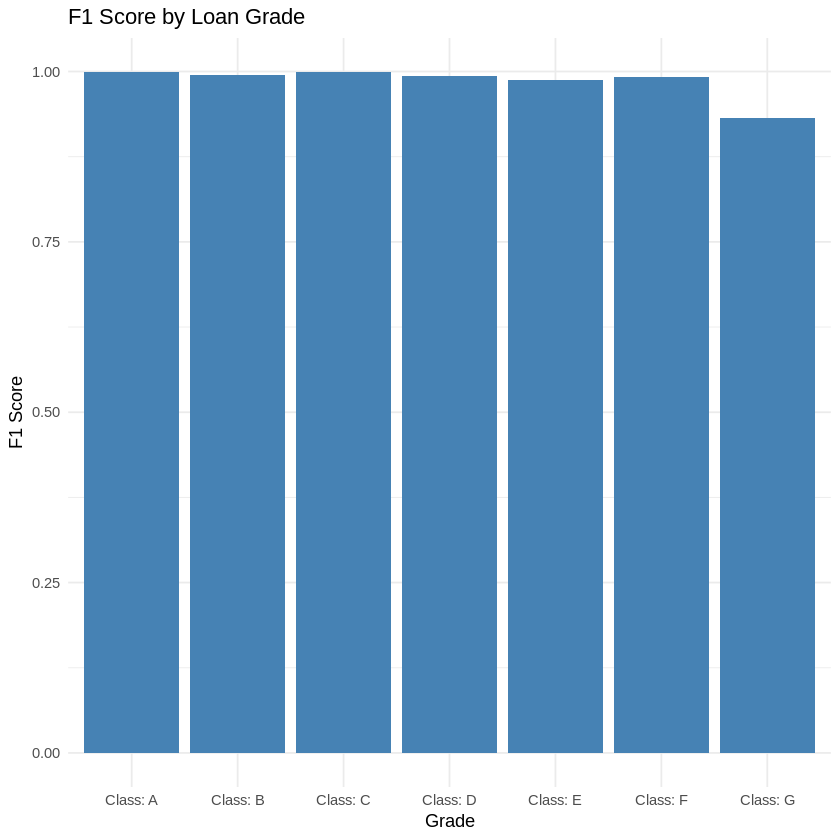

In [45]:
library(ggplot2)
f1_scores <- as.data.frame(conf_matrix$byClass)
f1_scores$Grade <- rownames(f1_scores)

ggplot(f1_scores, aes(x = Grade, y = F1)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "F1 Score by Loan Grade", x = "Grade", y = "F1 Score") +
  theme_minimal()


In [48]:
install.packages("pROC")
library(pROC)

test_probs <- predict(model, newdata = testing, type = "prob")
roc_curves <- list()
auc_values <- c()

for (class in levels(testing$grade)) {
    binary_labels <- ifelse(testing$grade == class, 1, 0)
    roc_curves[[class]] <- roc(binary_labels, test_probs[, class])
    auc_values[class] <- auc(roc_curves[[class]])
}
print(auc_values)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



        A         B         C         D         E         F         G 
0.9999190 0.9998260 0.9999374 0.9998223 0.9981102 0.9998546 0.9977388 


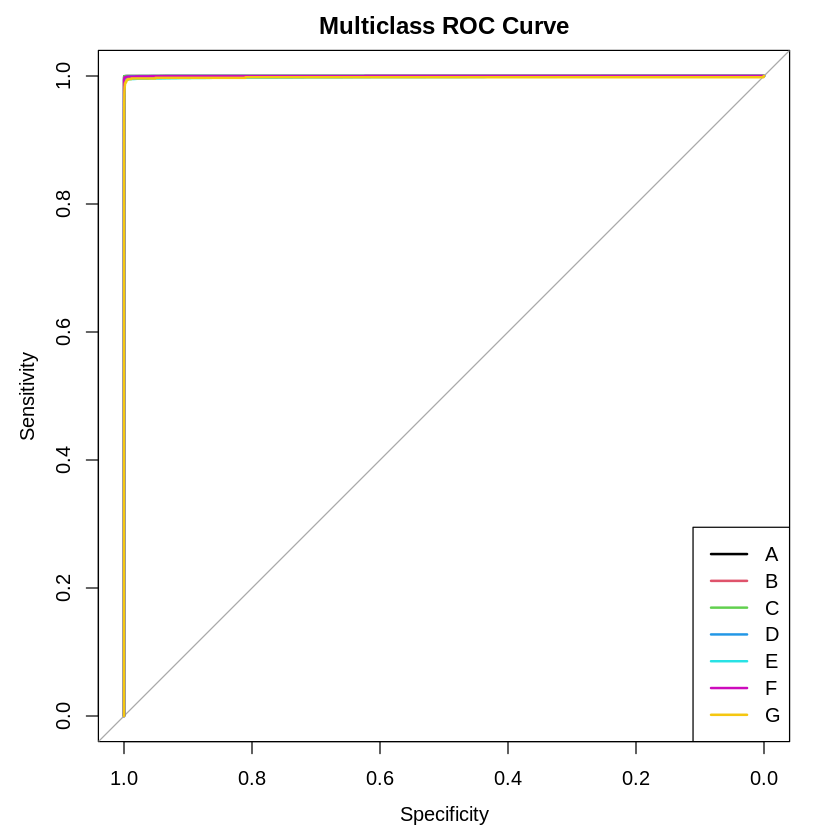

In [54]:
plot(roc_curves[[1]], col = 1, lwd = 2, main = "Multiclass ROC Curve")
for (i in 2:length(roc_curves)) {
    plot(roc_curves[[i]], col = i, add = TRUE, lwd = 2)
}
legend("bottomright", legend = levels(testing$grade), col = 1:length(roc_curves), lwd = 2)


In [55]:
install.packages("PRROC")
library(PRROC)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
training$grade<-relevel(training$grade,ref = "A")
train_control <- trainControl(method = "cv", number =3)
model <- train(grade ~ ., data = training, method = "multinom", trControl = train_control)

# weights:  791 (672 variable)
initial  value 920351.285464 
iter  10 value 258471.536310
iter  20 value 78808.841426
iter  30 value 65071.555510
iter  40 value 59385.891935
iter  50 value 55003.683554
iter  60 value 52404.658489
iter  70 value 51261.704167
iter  80 value 50274.052666
iter  90 value 49152.637246
iter 100 value 47295.864533
final  value 47295.864533 
stopped after 100 iterations
# weights:  791 (672 variable)
initial  value 920351.285464 
iter  10 value 258498.083103
iter  20 value 78865.302075
iter  30 value 65142.384009
iter  40 value 59472.506924
iter  50 value 55118.212136
iter  60 value 52552.563232
iter  70 value 51421.672544
iter  80 value 50439.881140
iter  90 value 49258.724164
iter 100 value 47881.923570
final  value 47881.923570 
stopped after 100 iterations
# weights:  791 (672 variable)
initial  value 920351.285464 
iter  10 value 258471.562857
iter  20 value 78808.897891
iter  30 value 65071.626354
iter  40 value 59385.978594
iter  50 value 55003.798258
it

In [53]:
testing$grade <- as.factor(testing$grade)
testing$grade<-relevel(testing$grade,ref = "A")
test_pred <- predict(model,newdata=testing)
conf_matrix=confusionMatrix(test_pred,testing$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction     A     B     C     D     E     F     G
         A 37004     0     7     9     7     2     0
         B     0 50757     0     5     3     4     0
         C    23    27 51121    25    10     0     3
         D     3     1     5 23408     0     0     0
         E     0     0     0     2 10370    17    50
         F    21    17    94    53   222  3090   111
         G     1     0     0     0     4     2   881

Overall Statistics
                                          
               Accuracy : 0.9959          
                 95% CI : (0.9956, 0.9962)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9947          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity       